In [92]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [54]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [55]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [56]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [57]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                     "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d",
                     "price_change_percentage_1y"]
scaler=StandardScaler()
df_market_data_scaled=scaler.fit_transform(df_market_data[numerical_columns])
df_market_data_scaled[0:5]


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [58]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=numerical_columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.index = crypto_names

# Display sample data
print(df_market_data_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [59]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [60]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using df_market_data_scaled
    kmeans_model.fit(df_market_data_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

print(inertia)

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.302379141625, 54.73992194210021, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


In [61]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

print(elbow_df)


    k_values     inertia
0          1  287.000000
1          2  195.820218
2          3  123.190482
3          4   79.022435
4          5   65.302379
5          6   54.739922
6          7   43.481606
7          8   37.517032
8          9   32.591891
9         10   28.222899
10        11   24.116198


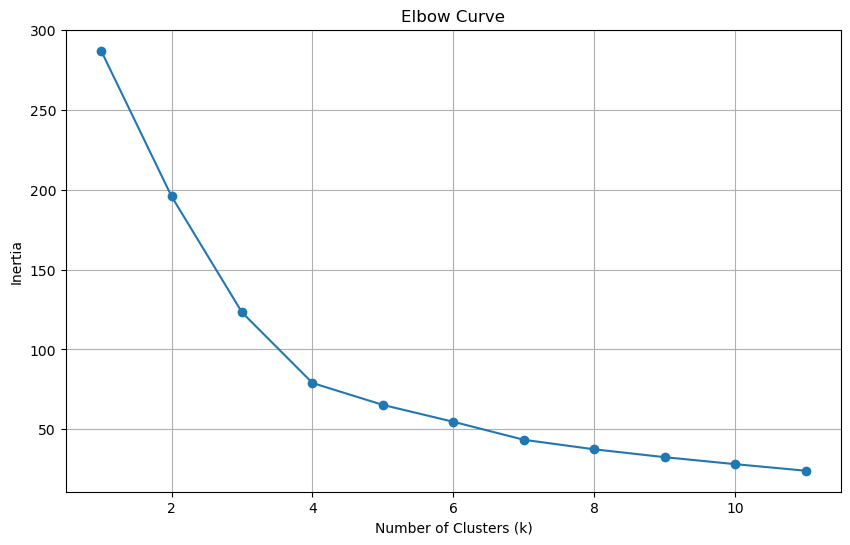

In [62]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
After observing the results, it appears that the Elbow Curve indicates potential optimal values for k to be either 3 or 4, as these points signify where the rate of inertia decrease slows down. While both values seem plausible, for the sake of initial analysis, I will proceed with k = 4. Subsequent steps will involve further exploration and validation to determine the most appropriate number of clusters for the given dataset and analysis objectives

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [63]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [64]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [65]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [66]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [67]:
df_market_data_copy['predicted_cluster'] = clusters

# Display sample data
print(df_market_data_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [68]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

hv_plot = df_market_data_copy.hvplot.scatter(x="price_change_percentage_24h", 
                                             y="price_change_percentage_7d", 
                                             by="predicted_cluster",
                                             hover_cols=["coin_id"],
                                             legend="top_left",
                                             title="Crypto Clusters")

hv_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [69]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [70]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed_data = pca_model.fit_transform(df_market_data_scaled)

df_pca_transformed = pd.DataFrame(data=pca_transformed_data, 
                                   columns=['PC1', 'PC2', 'PC3'], 
                                   index=df_market_data_scaled.index)

# View the first five rows of the DataFrame. 
print(df_pca_transformed.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [71]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

total_explained_variance = explained_variance_ratio.sum()
print(f"Total Explained Variance of the three principal components: {total_explained_variance:.4f}")    

Explained Variance Ratio:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760
Total Explained Variance of the three principal components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance of the three principal components: 0.8950

In [72]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(data=pca_transformed_data, 
                       columns=['PC1', 'PC2', 'PC3'], 
                       index=df_market_data_scaled.index)

# Copy the crypto names from the original data
df_pca['coin_id'] = df_market_data_scaled.index

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [73]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12)) 
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [74]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data
    kmeans_model_pca.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_pca.append(kmeans_model_pca.inertia_)

print(inertia_pca)

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

[256.8740855678925, 165.90199402036012, 93.77462568057295, 49.665496651797355, 37.83946598681243, 30.777746141441188, 21.134056037473606, 17.091636643864742, 13.68113969299275, 10.630647573870965, 8.128620320213491]


In [75]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k_values': k_values, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve for PCA
elbow_df_pca = pd.DataFrame(elbow_data_pca)

print(elbow_df_pca)


    k_values     inertia
0          1  256.874086
1          2  165.901994
2          3   93.774626
3          4   49.665497
4          5   37.839466
5          6   30.777746
6          7   21.134056
7          8   17.091637
8          9   13.681140
9         10   10.630648
10        11    8.128620


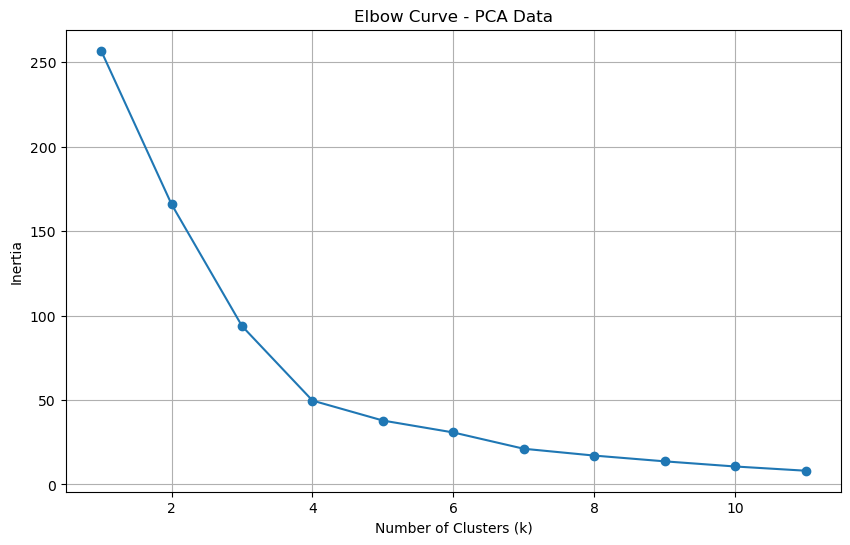

In [76]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_pca, marker='o', linestyle='-')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
Based on the elbow curve plotted using the PCA data, the optimal value for k appears to be 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  This value does not differ from the best k value found using the original data, which we selected as 4. Nevertheless, this is based on the subjective observation of charts.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [77]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [78]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Haillet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [79]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values
print(pca_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [80]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['predicted_cluster'] = pca_clusters

# Display sample data
print(df_pca_copy.head())

                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  2
ripple       -0.471835 -0.222660 -0.479053                  2
bitcoin-cash -1.157800  2.041209  1.859715                  0


In [81]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_pca_copy.hvplot.scatter(x="PC1", 
                                          y="PC2", 
                                          by="predicted_cluster",
                                          hover_cols=["coin_id"],
                                          legend="top_right",
                                          title="PCA Scatter Plot")

# Display the plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [82]:
print("Length of inertia for original data:", len(inertia))

# Check the length of inertia values for PCA data
print("Length of inertia for PCA data:", len(inertia_pca))

Length of inertia for original data: 11
Length of inertia for PCA data: 11


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

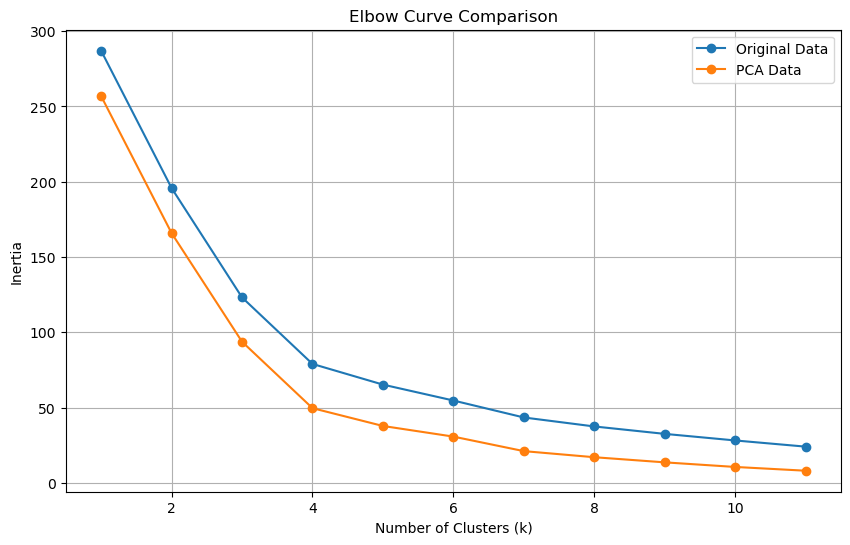

In [83]:
# Composite plot to contrast the Elbow curves

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Elbow curve for original data
ax.plot(k_values, inertia, label='Original Data', marker='o', linestyle='-')

# Plot Elbow curve for PCA data
ax.plot(k_values, inertia_pca, label='PCA Data', marker='o', linestyle='-')

# Set title and labels
ax.set_title('Elbow Curve Comparison')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Inertia')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()

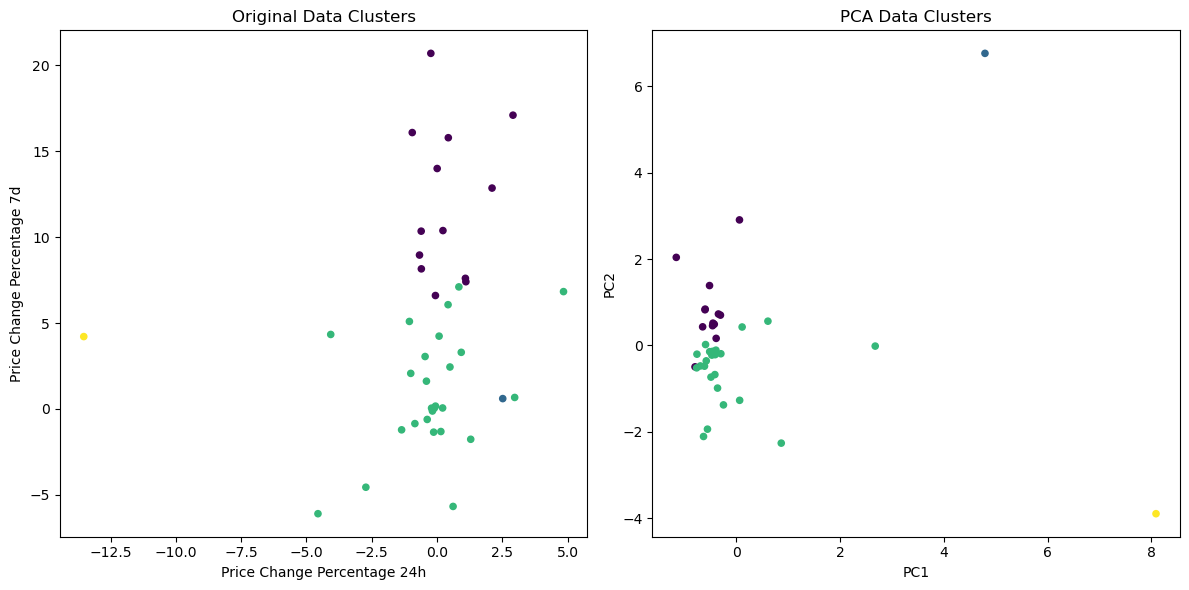

In [91]:
# Composite plot to contrast the clusters
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for original data clusters
df_market_data_copy.plot.scatter(x="price_change_percentage_24h", 
                                  y="price_change_percentage_7d", 
                                  c="predicted_cluster",
                                  cmap='viridis',
                                  ax=axs[0],
                                  colorbar=False)
axs[0].set_title('Original Data Clusters')
axs[0].set_xlabel('Price Change Percentage 24h')
axs[0].set_ylabel('Price Change Percentage 7d')

# Scatter plot for PCA data clusters
df_pca_copy.plot.scatter(x="PC1", 
                          y="PC2", 
                          c="predicted_cluster",
                          cmap='viridis',
                          ax=axs[1],
                          colorbar=False)
axs[1].set_title('PCA Data Clusters')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  Using fewer features to cluster data with K-Means simplifies the process by focusing on the most important aspects of the data but might lead to loss of important information. The choice of which features to include is crucial, as it affects the accuracy and interpretability of the clustering results. While fewer features make it easier to understand the clusters, they may also make clusters less distinct and more sensitive to the selection of features. Overall, using fewer features can help streamline the analysis but requires careful consideration to balance simplicity and accuracy in capturing the underlying patterns in the data